# Assigment 2: Deep Learning

## Generate Dataset

This is the same code from Assignment 1

In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

# Generate the data
X, y = datasets.make_regression(n_samples=100, n_features=5, noise=5, random_state=4)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)


## Visualize Dataset
This is the same code from Assignment 1

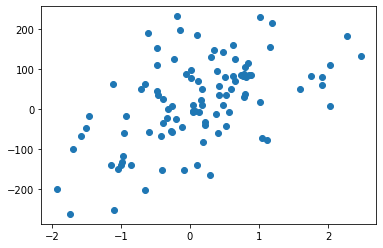

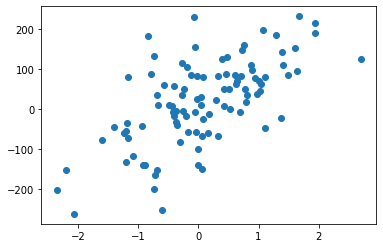

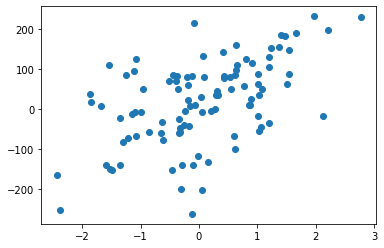

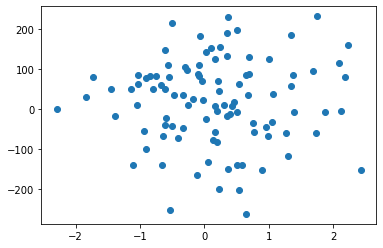

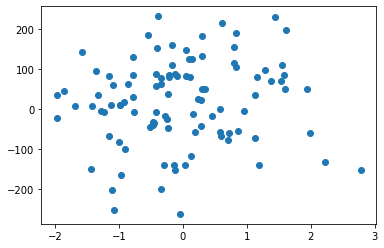

In [ ]:
import matplotlib.pyplot as plt
for i in range(0,5):
   plt.scatter(X[:,i],y)
   plt.show()

# Your code here

## Model Definition

Using TensorFlow, build a model with the following definition:
> Input of shape 5 \\
> Dense of shape 5 \\
> Dense of shape 5 \\
> Dense of shape 1 \\

Use Mean Square Error Loss and Stochaistic Gradient Descent (SGD) Optimizer

Use Gradient Decay with appropriate parameters

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

normalizer = tf.keras.layers.Normalization(axis=-1)

model = tf.keras.Sequential([
        normalizer,
        layers.Dense(5, activation="relu"),
        layers.Dense(5, activation="relu"),
        layers.Dense(1),
    ])

In [ ]:
model.compile(
    optimizer=tf.optimizers.SGD(learning_rate=0.0001,momentum=0.0,nesterov=False),
    loss=tf.keras.losses.MeanSquaredError())

In [ ]:
model.predict(X_test[:10])

array([[0.31310534],
       [1.2050635 ],
       [0.17484552],
       [0.4208899 ],
       [0.41227284],
       [1.473581  ],
       [0.24785964],
       [0.24823245],
       [0.93612427],
       [0.7975492 ]], dtype=float32)

In [ ]:
model.layers[1].kernel

<tf.Variable 'dense/kernel:0' shape=(5, 5) dtype=float32, numpy=
array([[-0.2271033 , -0.58875644, -0.3618698 , -0.5176804 ,  0.5044044 ],
       [-0.5437286 , -0.4009396 , -0.4463592 ,  0.5134343 ,  0.6064863 ],
       [-0.36290088, -0.3477615 ,  0.5011039 , -0.02917379,  0.26982784],
       [ 0.11709619,  0.2960484 , -0.24130172,  0.47170162,  0.07167715],
       [ 0.31001914,  0.42019475,  0.54998386,  0.18301004, -0.5315195 ]],
      dtype=float32)>

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 5)                11        
 n)                                                              
                                                                 
 dense (Dense)               (None, 5)                 30        
                                                                 
 dense_1 (Dense)             (None, 5)                 30        
                                                                 
 dense_2 (Dense)             (None, 1)                 6         
                                                                 
Total params: 77
Trainable params: 66
Non-trainable params: 11
_________________________________________________________________


In [ ]:
%%time
history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    verbose=0, epochs=1000)

CPU times: user 27.7 s, sys: 943 ms, total: 28.6 s
Wall time: 33.5 s


## Plot Loss

Using matplotlib visualise how the loss (both validation and training) is changing, use this information to retrain the model with appropriate parameters.<br>We ideally want the loss to be constant over the last few iterations.

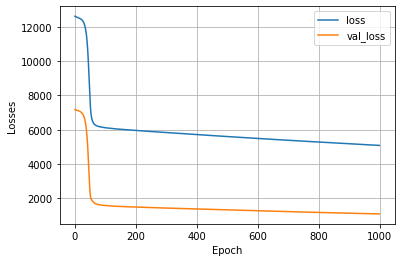

In [ ]:
# Your code here
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
##plt.ylim([0, 10])
plt.xlabel('Epoch')
plt.ylabel('Losses')
plt.legend()
plt.grid(True)

## Evaluation Metrics
Use the R2 Score function implemented in the first assignment to evaluate the performance of the model.

In [ ]:
predictions = model.predict(X_test)

In [ ]:
# Insert the function for R2 Score
from sklearn.metrics import r2_score

print(r2_score(y_test,predictions))

0.750713008934787


## Your own custom model
Build a custom model of your own choice.<br>
Describe it in detail in Markdown/Latex in the cell below.<br>
Visualise the loss, as before.

Your text here

In [ ]:
# Your code here
from sklearn import datasets
from sklearn.model_selection import train_test_split

# Generate the data
X, y = datasets.make_regression(n_samples=10000, n_features=5, noise=5, random_state=4)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

normalizer = tf.keras.layers.Normalization(axis=-1)

model = tf.keras.Sequential([
        normalizer,
        layers.Dense(5, activation="relu"),
        layers.Dense(5, activation="relu"),
        layers.Dense(5, activation="relu"),
        layers.Dense(1),
    ])

In [ ]:
model.compile(
    optimizer=tf.optimizers.SGD(learning_rate=0.00001,momentum=0.0,nesterov=False),
    loss=tf.keras.losses.MeanSquaredError())

In [ ]:
model.predict(X_train[:10])

array([[ 0.6773961 ],
       [-0.5797071 ],
       [ 0.05788051],
       [ 0.44557992],
       [ 0.        ],
       [ 0.03590148],
       [-0.47113895],
       [ 0.00925681],
       [ 0.536139  ],
       [ 0.2729909 ]], dtype=float32)

In [ ]:
model.layers[1].kernel

<tf.Variable 'dense_3/kernel:0' shape=(5, 5) dtype=float32, numpy=
array([[-0.34211996,  0.49664855, -0.06043524, -0.73171884, -0.14150602],
       [-0.508388  ,  0.7295513 , -0.5676887 ,  0.4253323 ,  0.58934987],
       [ 0.5362967 ,  0.33204353, -0.37392652,  0.39945567, -0.28679368],
       [-0.37265614,  0.20271814,  0.21916598,  0.09697068, -0.5504036 ],
       [-0.06320649,  0.23713613,  0.6490872 , -0.4767973 , -0.17505205]],
      dtype=float32)>

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_1 (Normalizat  (None, 5)                11        
 ion)                                                            
                                                                 
 dense_3 (Dense)             (None, 5)                 30        
                                                                 
 dense_4 (Dense)             (None, 5)                 30        
                                                                 
 dense_5 (Dense)             (None, 5)                 30        
                                                                 
 dense_6 (Dense)             (None, 1)                 6         
                                                                 
Total params: 107
Trainable params: 96
Non-trainable params: 11
________________________________________________________

In [ ]:
%%time
history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    verbose=0, epochs=500)

CPU times: user 2min 38s, sys: 11.5 s, total: 2min 50s
Wall time: 2min 20s


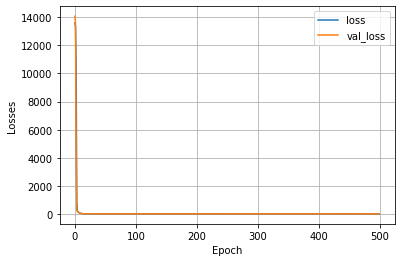

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
##plt.ylim([0, 10])
plt.xlabel('Epoch')
plt.ylabel('Losses')
plt.legend()
plt.grid(True)

In [ ]:
predictions = model.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score

print(r2_score(y_test,predictions))

0.9982188391781242
